<a href="https://colab.research.google.com/github/morrison98/sic_ai_2025_jun/blob/main/03machinelearning/contribuciones_estudiantes/Contribucion_vinos_Sebastian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
X = df[["alcohol", "malic_acid", "ash","alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
%pip install estyp


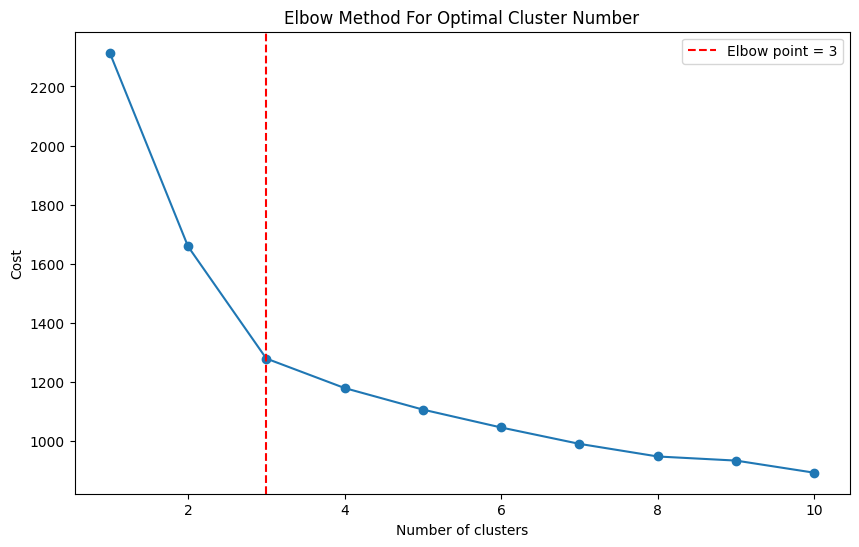

In [ ]:
from sklearn.cluster import KMeans
from estyp.cluster import NClusterSearch


searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

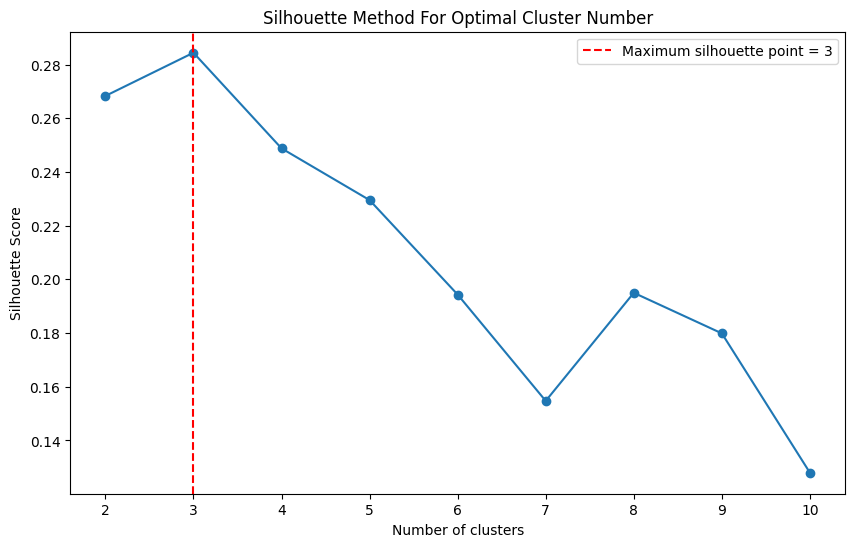

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from estyp.cluster import NClusterSearch

searcher = NClusterSearch(estimator=KMeans(), method='silhouette')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

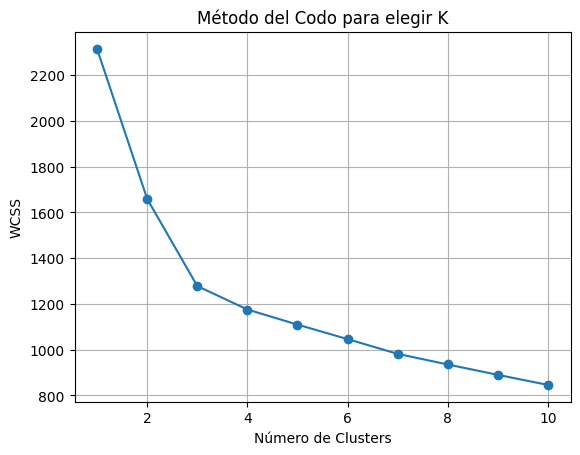

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Método del Codo para elegir K")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

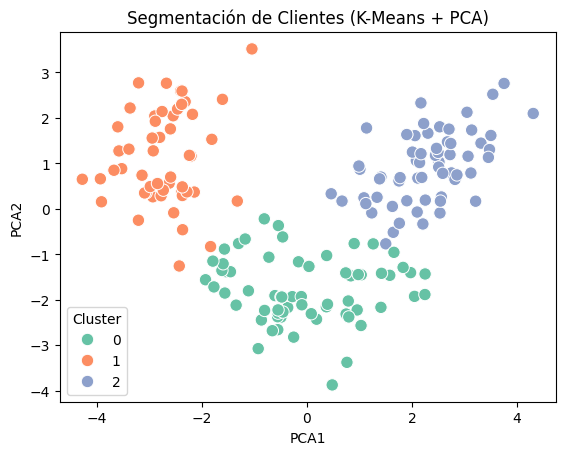

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Segmentación de Clientes (K-Means + PCA)")
plt.show()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Clustering jerárquico (agglomerative)
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Text(0, 0.5, 'Componente Principal 2')

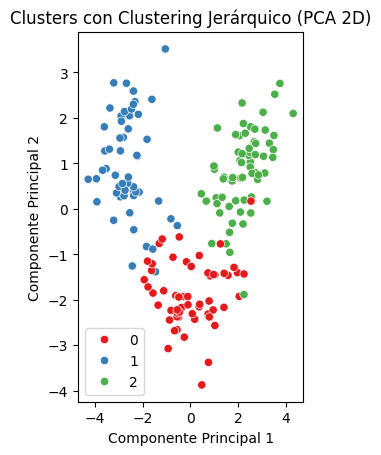

In [ ]:
# Gráfico Agglomerative
plt.subplot(1, 2, 2)
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=agglo_labels, palette='Set1')
plt.title("Clusters con Clustering Jerárquico (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
